# Aquatic microbial communities subjected to various antibiotic treatments     
We are investigating aquatic microbial communities subjected to various antibiotic treatments. This analysis uses the Waveome tool, encompassing data preparation, Waveome kernel search, and visualization. Sampling occurred over time, and we sequenced microbes from two size fractions: those larger than 3 µm and those between 0.22 µm and 3 µm. For both fractions, we analyzed 16S, 18S, and ITS1 sequences. This resulted in a dataset with 3 markers, 2 size fractions, 4 treatments, and 7 time points. Our goal is to detect and quantify changes in microbiome composition over time and explore their association with environmental co-variables measured at each time point, such as nutrients, chlorophyll, temperature, and pH.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

from waveome.model_search import GPSearch

In [2]:
def select_top_variance_columns(df, n=100):
    """Selects the top n columns with highest variance from a pandas DataFrame."""

    # Calculate variance for each column
    variances = df.var()

    # Sort columns by variance in descending order
    top_columns = variances.nlargest(n).index

    # Return a DataFrame with only the selected columns
    return df[top_columns]

In [3]:
# with open('/Users/rahnavard/Downloads/gps_output_3var_run_search.pkl', 'rb') as f:
#     gps = pickle.load(f)
# axis_temp = gps.plot_heatmap(var_cutoff=0.01, cluster=True)#, figsize= (10,3.75)
# axis_temp.savefig('/Users/rahnavard/Downloads/gps_output_3var_run_search.png', dpi=300, bbox_inches="tight")

In [4]:
# axis_plot_parts = gps.plot_parts(
#     out_label='ASV7', 
#     x_axis_label='time_days',
#     #unit_label=0
# )
#axis_plot_parts.savefig('/Users/rahnavard/Downloads/axis_plot_parts_3var_run_search.png', dpi=300, bbox_inches="tight")
# plt.savefig('/Users/rahnavard/Downloads/axis_plot_parts_3var_run_search.png')

Here, we will read the values of ASV microbiome (16S) data and the sample data. In the following code, you need to change `<PATH_TO_FILE>` to the corresponding directory where you have saved the `.txt` files.

In [5]:
path_to_file = os.path.expanduser("~/Library/CloudStorage/Box-Box/Waveome/data/Eduardo_Environment/Project")
otu_table = pd.read_csv(f"{path_to_file}/otu_table.txt",
                        header=0, index_col=0, sep ='\t')
sam_table = pd.read_csv(f"{path_to_file}/sam_table.txt",
                        header=0, index_col=0, sep ='\t')


In [6]:
# Sum over size fractions tested given identical environment variables
otu_table_summarized = (
    otu_table
    .join(
        other=sam_table[["treatment", "time_days"]]
    ).groupby(
        by=["treatment", "time_days"],
        as_index=False
    ).sum()
    .sort_values(
        by=["treatment", "time_days"]
    )
    .drop(columns=["treatment", "time_days"])
)
print(f"{otu_table_summarized.shape=}")
otu_table_summarized.head()

otu_table_summarized.shape=(28, 463)


,ASV1,ASV2,ASV3,ASV4,ASV5,ASV6,ASV7,ASV8,ASV9,ASV10,...,ASV1250,ASV1266,ASV1274,ASV1328,ASV1364,ASV1498,ASV1499,ASV1538,ASV1760,ASV2296
0,24,34,13,17,17,0,3,0,0,26,...,0,2,0,0,0,2,0,0,0,0
1,20,23,11,18,14,10,5,7,0,15,...,1,0,1,0,1,1,0,0,1,0
2,26,12,13,12,17,8,5,14,0,12,...,0,0,2,0,0,0,0,0,0,1
3,23,14,17,16,23,12,15,17,0,5,...,0,0,0,0,0,0,0,0,0,0
4,20,25,12,19,19,8,15,14,0,14,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Inspect one treatment and time point to see that the size_fraction is the only difference
pd.set_option('display.max_columns', None)
sam_table.query("treatment == 'C1' and time_days == 0")

,sample_ID,treatment,time_points,conc_ug_ul,pH,temp_C,turb_FNU,TDS_ppm,elec_ms_cm,conduc_mS,POR,DO_pct,do_ppm,salinity_PSU,mVpH,ms_cm4,dna_extraction_ID,sampling_date,time_days,size_fraction__um,treatment_description,antibiotic_added,size_um,N2_mg,N2_ug,C_mg,C_ug,C_N,nitrate_nitrite_uM,phosphate_uM,salicylic.acid_uM,nitrite_uM,nitrate_uM,chl_a_mg_L
CELF20,25M,C1,T-1,0.163,6.82,11.63,0.0,5114.0,10.22,4.1,316.9,57.2,6.02,5.81,21.3,7629.0,CELF20,may_04_2023,0,3_00,fish feed control (600 g pellet),NaN,3_00,0.044214,44.213899,0.268272,268.27239,6.067603,2.9,0.0,48,0.11,2.8,1.76664
CELF30,1M,C1,T-1,0.620,6.82,11.63,0.0,5114.0,10.22,4.1,316.9,57.2,6.02,5.81,21.3,7629.0,CELF30,may_04_2023,0,3_00,fish feed control (600 g pellet),NaN,3_00,0.044214,44.213899,0.268272,268.27239,6.067603,2.9,0.0,48,0.11,2.8,1.76664
CESF21,27S,C1,T-1,11.600,6.82,11.63,0.0,5114.0,10.22,4.1,316.9,57.2,6.02,5.81,21.3,7629.0,CESF21,may_04_2023,0,0_22,fish feed control (600 g pellet),NaN,0_22,0.044214,44.213899,0.268272,268.27239,6.067603,2.9,0.0,48,0.11,2.8,1.76664


In [ ]:
# Aggregate over size fractions to account for repeated metadata information
sam_table_summarized = (
    sam_table[[
        # ID columns
        "treatment", "time_days",
        # Environment columns
        "pH", "temp_C",
        "turb_FNU", "TDS_ppm",
        "elec_ms_cm", "conduc_mS",
        "POR", "DO_pct",
        "do_ppm", "salinity_PSU",
        "mVpH", "ms_cm4",
        "N2_mg", "C_mg",
        "C_N", "nitrate_nitrite_uM",
        "phosphate_uM", "salicylic.acid_uM",
        "nitrite_uM", "nitrate_uM",
        "chl_a_mg_L"
    ]]
    .drop_duplicates()
    .sort_values(by=["treatment", "time_days"])
    .reset_index(drop=True)
)
print(f"{sam_table_summarized.shape=}")
sam_table_summarized.head()

sam_table_summarized.shape=(28, 23)


,treatment,time_days,pH,temp_C,turb_FNU,TDS_ppm,elec_ms_cm,conduc_mS,POR,DO_pct,do_ppm,salinity_PSU,mVpH,ms_cm4,N2_mg,C_mg,C_N,nitrate_nitrite_uM,phosphate_uM,salicylic.acid_uM,nitrite_uM,nitrate_uM,chl_a_mg_L
0,C1,0,6.82,11.63,0.0,5114.0,10.22,4.1,316.9,57.2,6.02,5.81,21.3,7629.0,0.044214,0.268272,6.067603,2.9,0.00,48,0.11,2.8,1.76664
1,C1,1,6.99,12.51,0.0,5084.0,10.16,3.9,307.8,60.8,6.28,5.77,11.9,7756.0,0.035311,0.171155,4.847103,3.2,9.28,56,0.20,3.0,1.84458
2,C1,2,6.48,12.18,0.0,5004.0,10.00,3.9,342.7,64.5,6.69,5.68,9.2,7568.0,0.069232,0.567935,8.203394,3.3,16.06,55,0.32,3.0,1.15611
3,C1,3,6.35,13.34,30.2,5097.0,10.19,3.8,304.2,34.5,3.51,5.79,47.9,7926.0,0.325227,1.647823,5.066683,2.0,5.14,18,0.17,1.8,1.53282
4,C1,4,6.07,12.48,25.5,5166.0,10.33,4.0,338.0,14.3,1.48,5.87,63.2,7875.0,0.468832,2.334425,4.979241,2.1,16.17,37,0.24,1.9,0.64950


In [9]:
# # Can select the top outcomes based on variance if we want to reduce the number of models
# otu_table_top = select_top_variance_columns(otu_table_summarized, n=150)
# otu_table_top = otu_table_top.astype(float)

In [ ]:
path_to_output = os.path.expanduser(
    "~/Library/CloudStorage/Box-Box/Waveome/results/Eduardo_Environment/gps_output_3var_run_search.pkl"
)

# Check if model output is already available
if os.path.exists(path_to_output):
    print("Reading in saved model object!")
    with open(path_to_output, "rb") as f:
        gps = pickle.load(f)

else:
    # Instatiate search object
    gps = GPSearch(
        X=sam_table_summarized,
        Y=otu_table_summarized,
        unit_col="treatment",
        outcome_likelihood="negativebinomial",
        Y_transform=None,
        standardize_X=True
    )

    # Takes ~30 minutes (scipy optimizer)
    gps.penalized_optimization(
        random_seed=9102
    )

    # Save modeling object
    with open(path_to_output, "wb") as f:
        pickle.dump(gps, f)

Converting treatment to numeric
Building 463 models...


(pid=82952)  0:   0%|          | 0.00/463 [00:00<?, ?it/s]

Finished 463 models (100%), elapsed time: 25.6 minutes


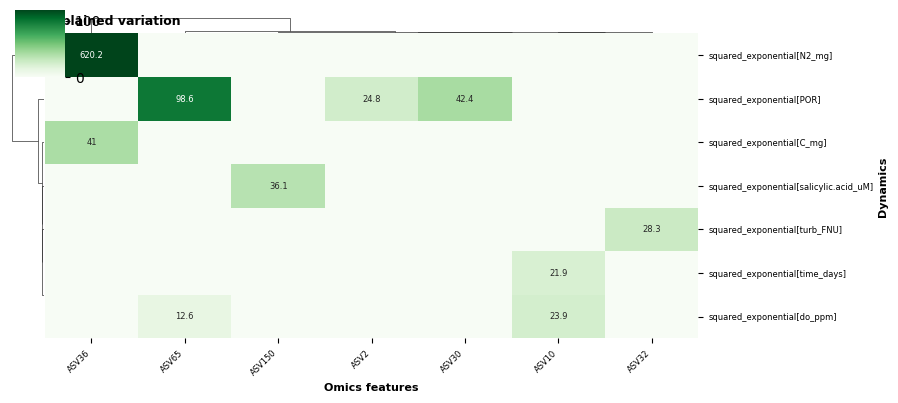

In [26]:
# Take a look at output
axis_temp = gps.plot_heatmap(var_cutoff=0.01, cluster=True, figsize=(10, 3.75))

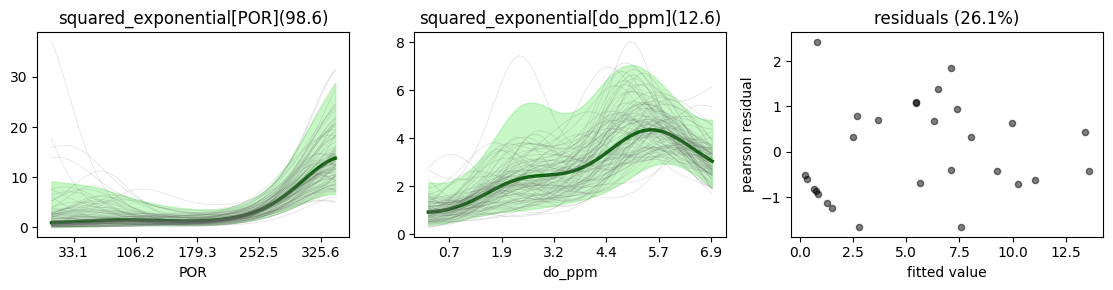

In [ ]:
# Plot a few of the "top" models/ASVs of interest
p = gps.plot_parts(
    out_label="ASV65", 
    x_axis_label="POR",
    figsize=(15, 3),
    reverse_transform_axes=True
)
plt.show()

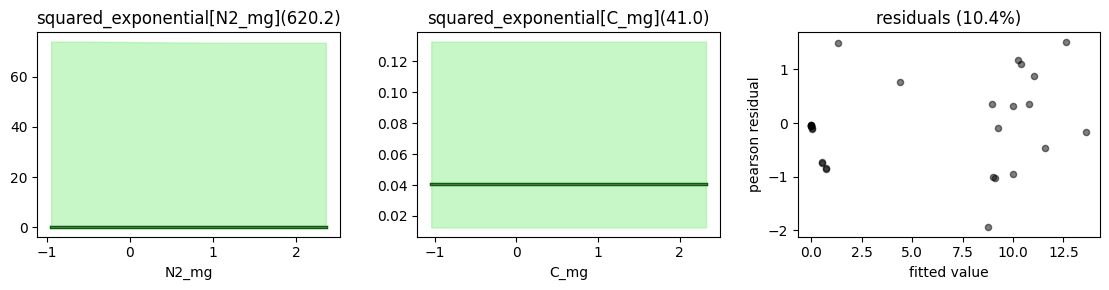

In [ ]:
# Need to plot marginal plots because N2_mg and C_mg are highly correlated
gps.plot_parts(
    out_label="ASV36", 
    x_axis_label="N2_mg",
    figsize=(15, 3),
    reverse_transform_axes=True
)
plt.show()

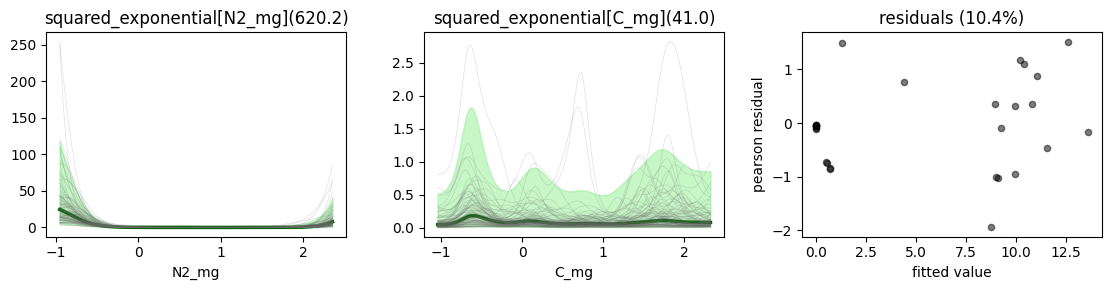

In [ ]:
# Marginal plot for the same output above
gps.plot_parts(
    out_label="ASV36", 
    x_axis_label="N2_mg",
    figsize=(15, 3),
    reverse_transform_axes=True
)
plt.show()

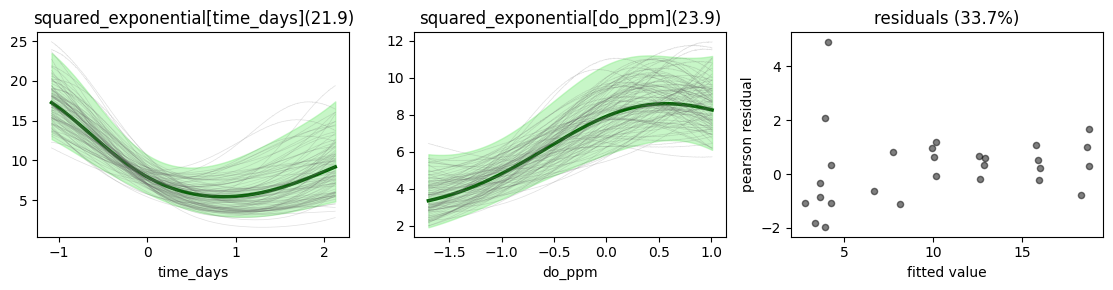

In [ ]:
p = gps.plot_parts(
    out_label="ASV10", 
    x_axis_label="time_days",
    figsize=(15, 3),
    reverse_transform_axes=True
)
plt.show()

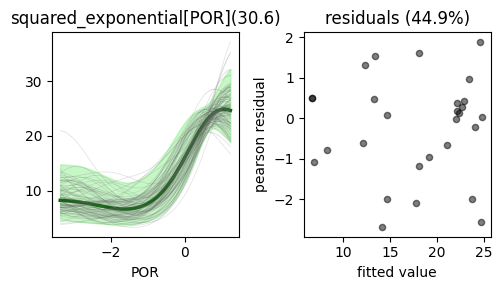

In [ ]:
gps.plot_parts(
    out_label="ASV2", 
    x_axis_label="time_days",
    figsize=(10, 3),
    reverse_transform_axes=True
)
plt.show()

## Hypothesis Two
What if we only focus on using treatment in the metadata option? Does this change ASVs of interest? Also because we aren't using duplicate metadata variables we can use the original data at the (treatment, time, size) level.

In [ ]:
# Now run this just for treatment and time days
path_to_output = os.path.expanduser(
    "~/Library/CloudStorage/Box-Box/Waveome/results/Eduardo_Environment/gps_output_3var_run_search_treat.pkl"
)

# Check if model output is already available
if os.path.exists(path_to_output):
    print("Reading in saved model object!")
    with open(path_to_output, "rb") as f:
        gps_treat = pickle.load(f)

else:
    gps_treat = GPSearch(
        X=sam_table[["treatment", "time_days", "size_um"]],
        Y=otu_table,
        unit_col="treatment",
        categorical_vars=["size_um"],
        outcome_likelihood="negativebinomial",
        Y_transform=None,
        standardize_X=True
    )

    # Takes ~30 minutes (scipy optimizer)
    gps_treat.penalized_optimization(
        random_seed=9102
    )

    # Save modeling object
    with open(path_to_output, "wb") as f:
        pickle.dump(gps_treat, f)

Reading in saved model object!


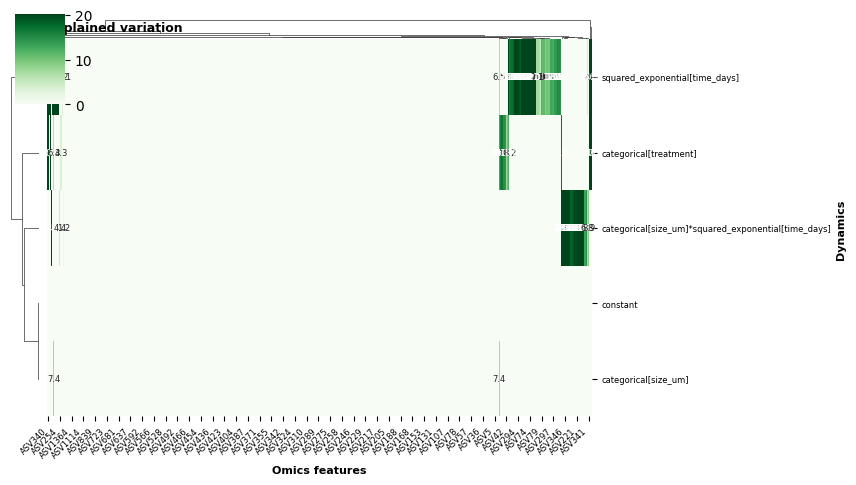

In [ ]:
# Plot the heatmap of model components
gps_treat.plot_heatmap(var_cutoff=0, figsize=(10, 5))

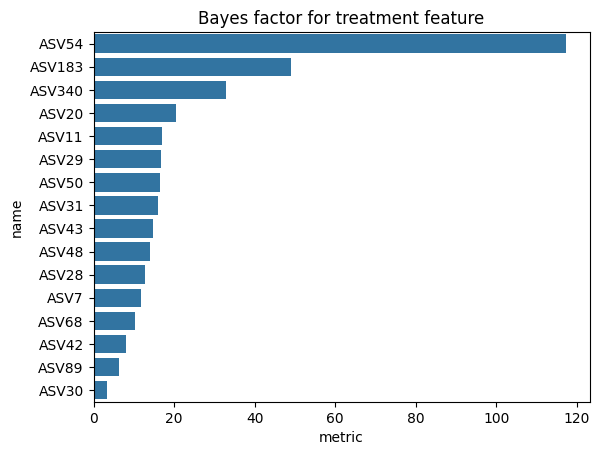

In [ ]:
# Show the ASVs that have the highest relationship with treatment level
gps_treat.plot_feature_metrics(
    feature_name="treatment",
    min_total_explained=0
)

plt.title("Bayes factor for treatment feature")
plt.show()

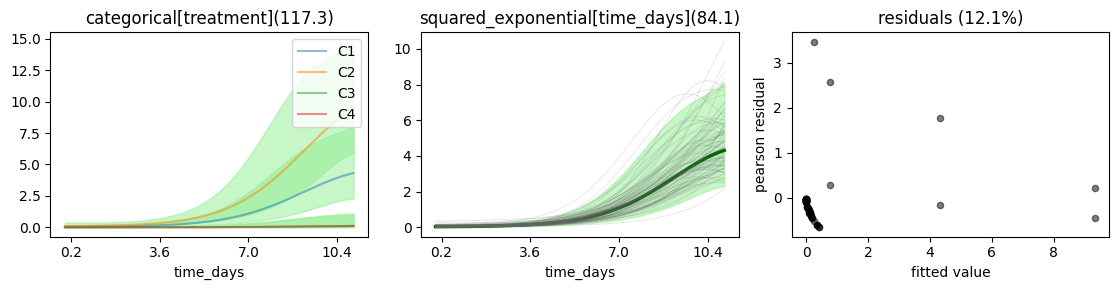

In [20]:
gps_treat.plot_parts(
    out_label="ASV54", 
    x_axis_label="time_days",
    figsize=(15, 3),
    reverse_transform_axes=True
)
plt.show()

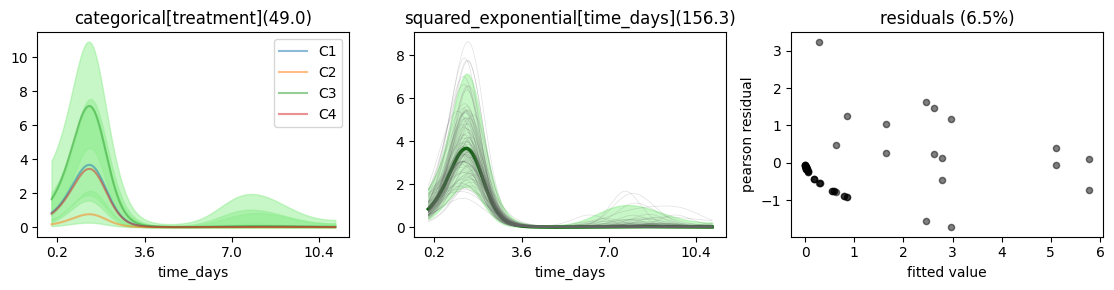

In [21]:
pkp = gps_treat.plot_parts(
    out_label="ASV183", 
    x_axis_label="time_days",
    figsize=(15, 3),
    reverse_transform_axes=True
)
plt.show()